# Tratando e Limpando dados do Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#Carregando o dataset
df = pd.read_csv('data/Twitch_game_data.csv')

In [3]:
#Cabeçalho
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [4]:
#Formato do dataset
df.shape

(18600, 12)

In [5]:
#Verificando tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              18600 non-null  int64  
 1   Game              18599 non-null  object 
 2   Month             18600 non-null  int64  
 3   Year              18600 non-null  int64  
 4   Hours_watched     18600 non-null  int64  
 5   Hours_streamed    18600 non-null  int64  
 6   Peak_viewers      18600 non-null  int64  
 7   Peak_channels     18600 non-null  int64  
 8   Streamers         18600 non-null  int64  
 9   Avg_viewers       18600 non-null  int64  
 10  Avg_channels      18600 non-null  int64  
 11  Avg_viewer_ratio  18600 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.7+ MB


In [6]:
#Calculando o total de valores ausentes por coluna
natotal = df.isna().sum()

#Calculando a porcentagem de valores ausentes por coluna
natotal_percent = 100 * natotal / len(df)

natotal_percent

Rank                0.000000
Game                0.005376
Month               0.000000
Year                0.000000
Hours_watched       0.000000
Hours_streamed      0.000000
Peak_viewers        0.000000
Peak_channels       0.000000
Streamers           0.000000
Avg_viewers         0.000000
Avg_channels        0.000000
Avg_viewer_ratio    0.000000
dtype: float64

In [7]:
# Calculando o número total de linhas com valores ausentes
linhas_na = sum([True for idx,row in df.iterrows() if any(row.isna())])

# Calculando o número total de linhas
total_linhas = df.shape[0]

# Calculando a porcentagem de linhas ausentes no dataset
print(round(((linhas_na/total_linhas) * 100), 2), "%", "das linhas no conjunto de dados contêm pelo menos um valor ausente.")

0.01 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [8]:
#Verificando quais linhas estão ausentes na coluna Game
print(df.query('Game != Game'))

      Rank Game  Month  Year  Hours_watched  Hours_streamed  Peak_viewers  \
7561   162  NaN      2  2019         317951           77004         30919   

      Peak_channels  Streamers  Avg_viewers  Avg_channels  Avg_viewer_ratio  
7561           5804      21758          473           114              4.13  


In [9]:
#Como tem apenas 1 linha com valor nulo iremos excluí-la
df = df.dropna()

In [10]:
#Conferindo se o tratamento foi executado corretamente
df.isna().sum()

Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [11]:
#Formato do dataset depois da exclusão
df.shape

(18599, 12)

# Análise Exploratória

In [12]:
#Qual a média de horas assistidas por ano?
df_media_ano = df.groupby(['Year'])['Hours_watched'].mean().round(2).reset_index(name ='Mean_Hours_watched')
print(df_media_ano)

   Year  Mean_Hours_watched
0  2016          2117819.33
1  2017          2518641.67
2  2018          3578367.76
3  2019          4180610.28
4  2020          7073530.45
5  2021          9227327.54
6  2022          8498916.56
7  2023          7973763.53


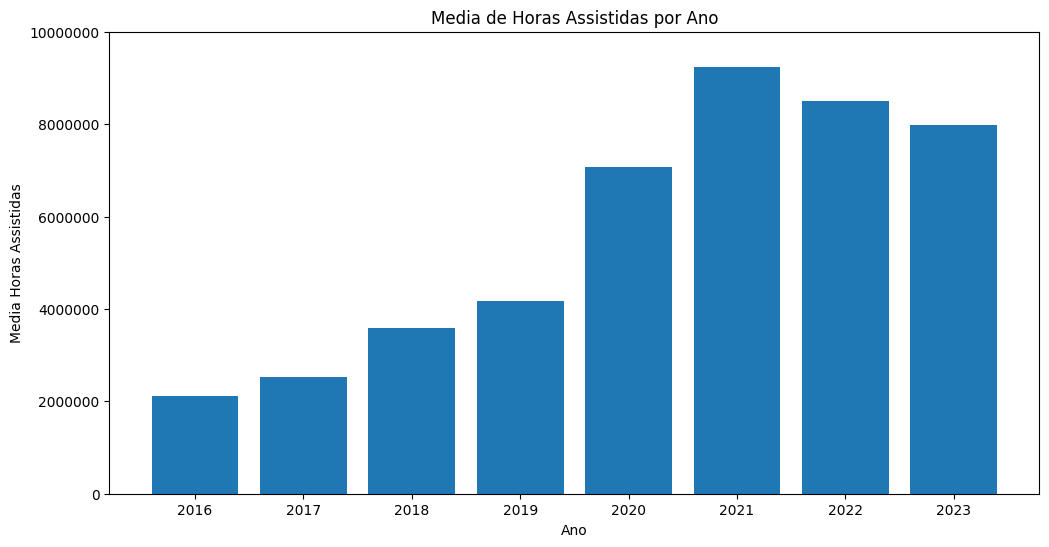

In [13]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')
plt.ylim(0, 10000000)

#Plot Principal
plt.bar(df_media_ano['Year'], df_media_ano['Mean_Hours_watched'])

#Adicionando os labels
plt.xlabel('Ano')
plt.ylabel('Media Horas Assistidas')
plt.title('Media de Horas Assistidas por Ano')

plt.show()

In [33]:
#Qual ano teve a maior media de Pico de visualizacoes?
df_media_peak_ano = df.groupby(['Year'])['Peak_viewers'].mean().round(2).reset_index(name ='Mean_Peak_viewers')
print(df_media_peak_ano)

   Year  Mean_Peak_viewers
0  2016           32478.14
1  2017           36387.02
2  2018           46592.54
3  2019           48236.51
4  2020           70660.32
5  2021           96223.40
6  2022           90518.70
7  2023           82183.83


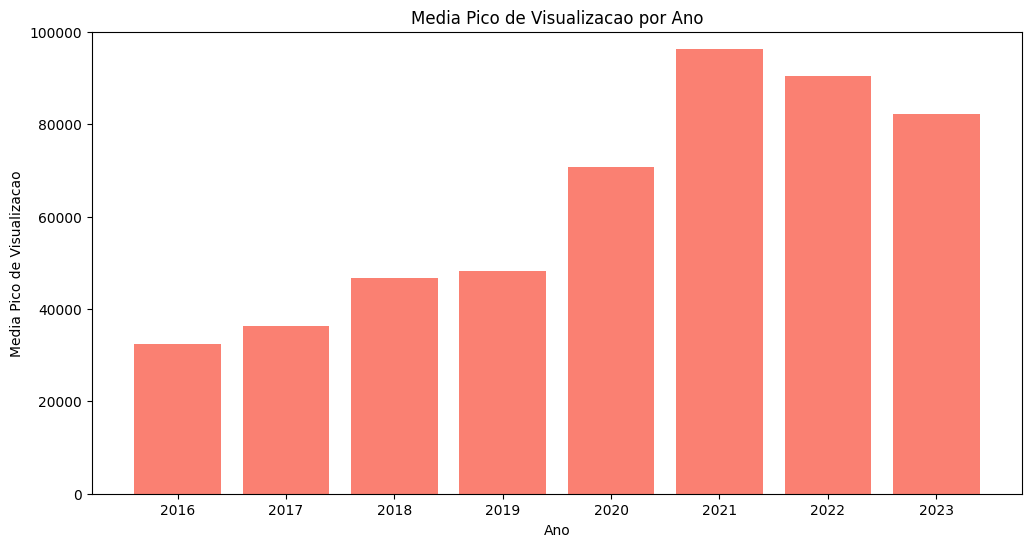

In [39]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')
plt.ylim(0, 100000)

#Plot Principal
plt.bar(df_media_peak_ano['Year'], df_media_peak_ano['Mean_Peak_viewers'], color = 'salmon')

#Adicionando os labels
plt.xlabel('Ano')
plt.ylabel('Media Pico de Visualizacao')
plt.title('Media Pico de Visualizacao por Ano')

plt.show()

In [14]:
#Qual a média de horas assistidas das 5 categorias mais assistidas?
df_media_game = df.groupby(['Game'])['Hours_watched'].mean().reset_index(name ='Mean_Hours_watched')


df_top5_games = df_media_game.sort_values(by=['Mean_Hours_watched'], ascending=False).head(5)

df_top5_games['Mean_Hours_watched'] = df_top5_games['Mean_Hours_watched'].round(1)

print(df_top5_games)

                    Game  Mean_Hours_watched
877        Just Chatting         186780345.6
942    League of Legends         107380057.3
2005            VALORANT          89244894.4
641             Fortnite          73346301.4
721   Grand Theft Auto V          64115728.6


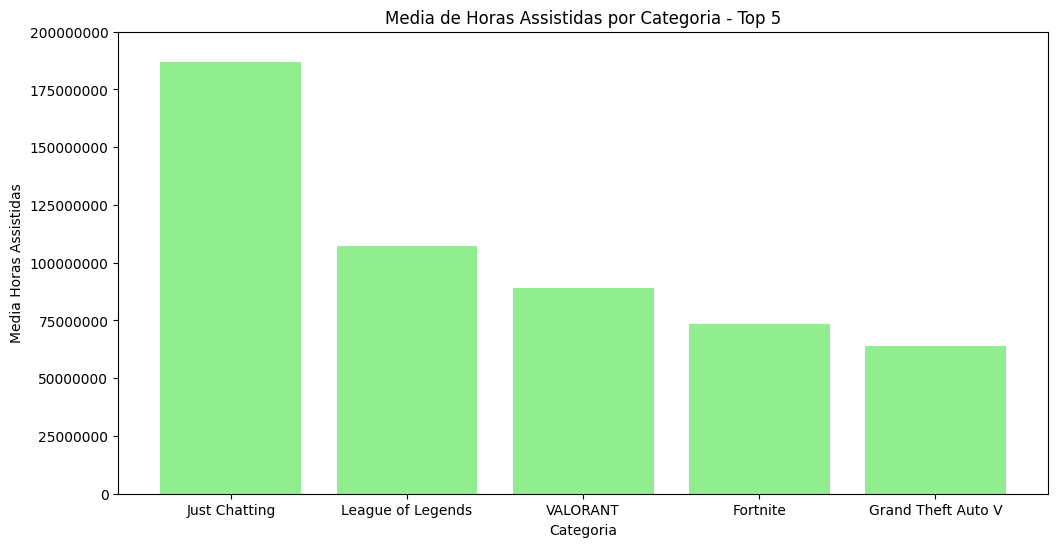

In [15]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')
plt.ylim(0, 200000000)

#Plot Principal
plt.bar(df_top5_games['Game'], df_top5_games['Mean_Hours_watched'], color = 'lightgreen')

#Adicionando os labels
plt.xlabel('Categoria')
plt.ylabel('Media Horas Assistidas')
plt.title('Media de Horas Assistidas por Categoria - Top 5')

plt.show()

In [16]:
#Qual foi a categoria mais assistida de cada ano?
df_soma_ano = df.groupby(['Year','Game'])['Hours_watched'].sum()
df_maior_por_ano = df_soma_ano.loc[df_soma_ano.groupby('Year').idxmax()].reset_index(name ='Total_Hours_watched')
print(df_maior_por_ano)

   Year               Game  Total_Hours_watched
0  2016  League of Legends           1035469850
1  2017  League of Legends           1022398595
2  2018           Fortnite           1358048914
3  2019  League of Legends           1118435546
4  2020      Just Chatting           1995891029
5  2021      Just Chatting           3020771657
6  2022      Just Chatting           3139111208
7  2023      Just Chatting           2336790283


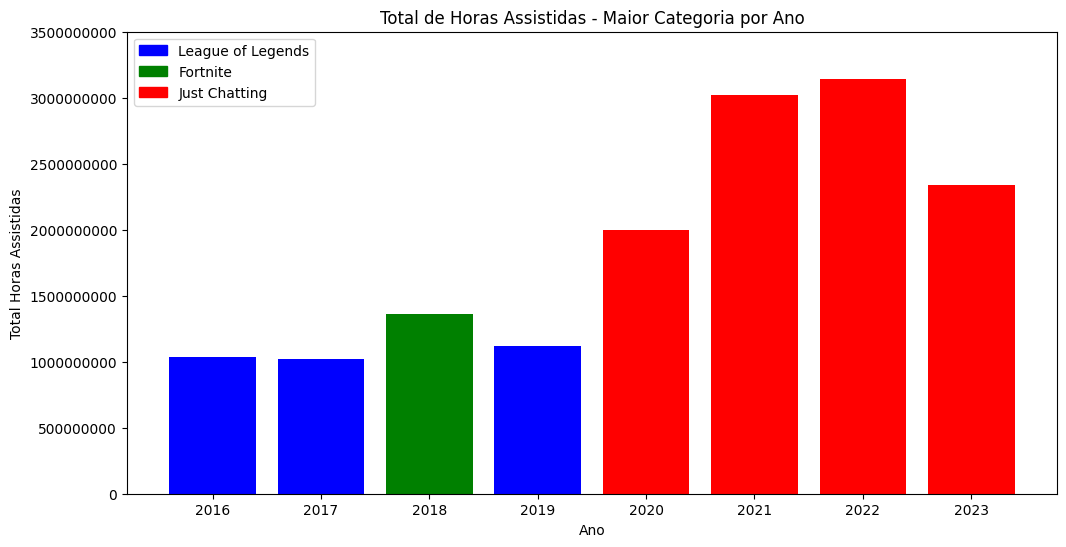

In [17]:
#Plot

#Lista de cores correspondente para as categorias
cores = {'League of Legends': 'blue', 'Fortnite': 'green', 'Just Chatting': 'red'}

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')
plt.ylim(0, 3500000000)


# Criando patches coloridos para a legenda
patches = [mpatches.Patch(color=cor, label=game) for game, cor in cores.items()]

#Plot Principal
plt.bar(df_maior_por_ano['Year'], df_maior_por_ano['Total_Hours_watched'], color=[cores[game] for game in df_maior_por_ano['Game']])


# Adicionando a legenda ao gráfico
plt.legend(handles=patches)

#Adicionando os labels
plt.xlabel('Ano')
plt.ylabel('Total Horas Assistidas')
plt.title('Total de Horas Assistidas - Maior Categoria por Ano')


plt.show()

In [18]:
#Qual foi o jogo mais assistido de cada ano?

#Para isolar somente jogos, vamos excluir a categoria "Just Chatting"
new_df = df.query('Game != "Just Chatting"')

new_df_soma_ano = new_df.groupby(['Year','Game'])['Hours_watched'].sum()
new_df_maior_por_ano = new_df_soma_ano.loc[new_df_soma_ano.groupby('Year').idxmax()].reset_index(name ='Total_Hours_watched')
print(new_df_maior_por_ano)

   Year                Game  Total_Hours_watched
0  2016   League of Legends           1035469850
1  2017   League of Legends           1022398595
2  2018            Fortnite           1358048914
3  2019   League of Legends           1118435546
4  2020   League of Legends           1553536532
5  2021  Grand Theft Auto V           1874989023
6  2022   League of Legends           1556699612
7  2023   League of Legends            978763404


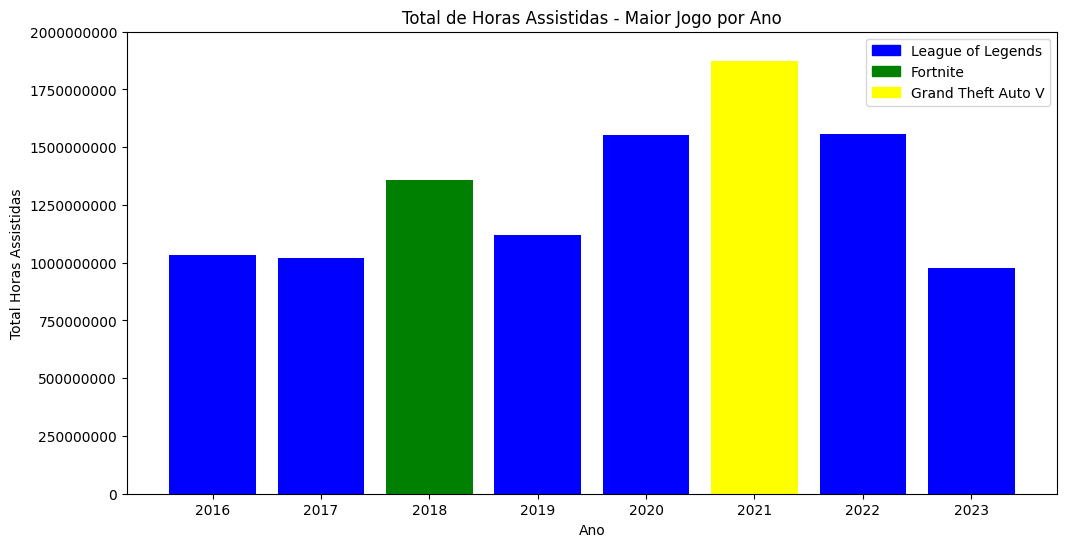

In [19]:
#Plot

#Lista de cores correspondente para as categorias
cores = {'League of Legends': 'blue', 'Fortnite': 'green', 'Grand Theft Auto V': 'yellow'}

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')
plt.ylim(0, 2000000000)


# Criando patches coloridos para a legenda
patches = [mpatches.Patch(color=cor, label=game) for game, cor in cores.items()]

#Plot Principal
plt.bar(new_df_maior_por_ano['Year'], new_df_maior_por_ano['Total_Hours_watched'], color=[cores[game] for game in new_df_maior_por_ano['Game']])


# Adicionando a legenda ao gráfico
plt.legend(handles=patches)

#Adicionando os labels
plt.xlabel('Ano')
plt.ylabel('Total Horas Assistidas')
plt.title('Total de Horas Assistidas - Maior Jogo por Ano')


plt.show()

In [20]:
# Qual a % de total de horas assistidas na categoria Just Chatting com relação a todos os Games?


df_games = df


# Atualizando os valores para 'Pre-Pandemia' onde a condição for verdadeira
df_games.loc[(df_games['Game'] != 'Just Chatting'), 'Game'] = 'Games'

df_soma_games = df_games.groupby(['Game'])['Hours_watched'].sum().reset_index(name ='Total_Hours_watched')

#Calculando a porcentagem de categoria
Total_Horas = df_games['Hours_watched'].sum()
df_soma_games['Porcentagem'] = 0

df_soma_games.loc[df_soma_games['Game'] == 'Games', 'Porcentagem'] = (df_soma_games['Total_Hours_watched'] / Total_Horas * 100).round(2)
df_soma_games.loc[df_soma_games['Game'] == 'Just Chatting', 'Porcentagem'] = (df_soma_games['Total_Hours_watched'] / Total_Horas * 100).round(2)


print(df_soma_games)

            Game  Total_Hours_watched  Porcentagem
0          Games          92223505272           89
1  Just Chatting          11393601079           11


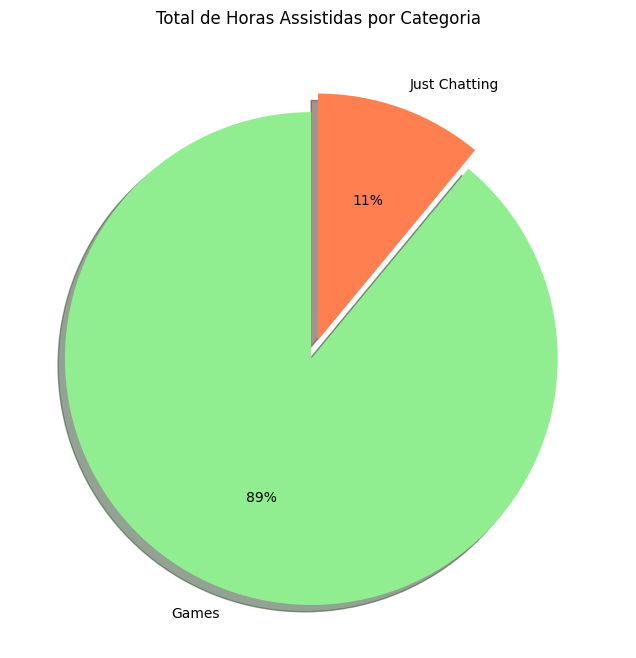

In [21]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (8,8))
explode = (0.08, 0.0)

#Plot Principal
plt.pie(df_soma_games['Porcentagem'], labels = df_soma_games['Game'], colors = ['lightgreen', 'coral'], autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)


#Adicionando os labels
plt.title('Total de Horas Assistidas por Categoria')

plt.show()

In [22]:
#Como se comporta a quantidade de streamers ao longo do tempo?
df_total_streamers_ano = df.groupby('Year')['Streamers'].sum().reset_index(name ='Total_Streamers')
print(df_total_streamers_ano)

   Year  Total_Streamers
0  2016         18906613
1  2017         22237820
2  2018         37390306
3  2019         41090394
4  2020         58740729
5  2021         69649171
6  2022         91829060
7  2023         66469992


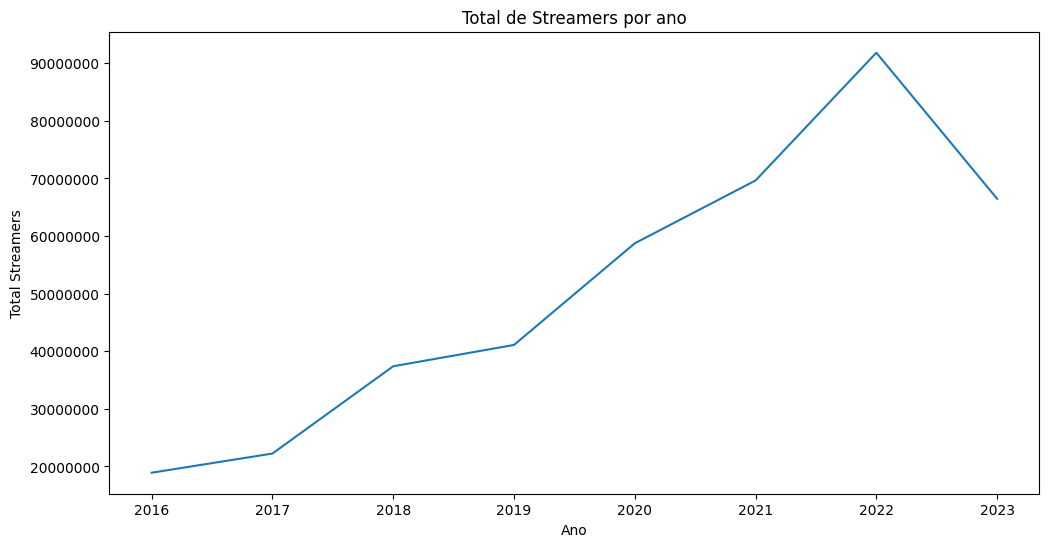

In [23]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')


#Plot Principal
plt.plot(df_total_streamers_ano['Year'], df_total_streamers_ano['Total_Streamers'])

#Adicionando os labels
plt.xlabel('Ano')
plt.ylabel('Total Streamers')
plt.title('Total de Streamers por ano')

plt.show()

In [24]:
#Como se comporta a media de Espectadores e Canais ao longo do tempo?
df_mediaviewiers_ano = df.groupby('Year')['Avg_viewers'].mean().round(2).reset_index(name ='Viewers')
df_mediastreamers_ano = df.groupby('Year')['Streamers'].mean().round(2).reset_index(name ='Streamers')
print(df_mediaviewiers_ano)
print(df_mediastreamers_ano)


   Year   Viewers
0  2016   2896.70
1  2017   3454.73
2  2018   4904.79
3  2019   5736.30
4  2020   9670.73
5  2021  12661.66
6  2022  11669.32
7  2023  10972.45
   Year  Streamers
0  2016    7877.76
1  2017    9265.76
2  2018   15579.29
3  2019   17128.13
4  2020   24475.30
5  2021   29020.49
6  2022   38262.11
7  2023   36927.77


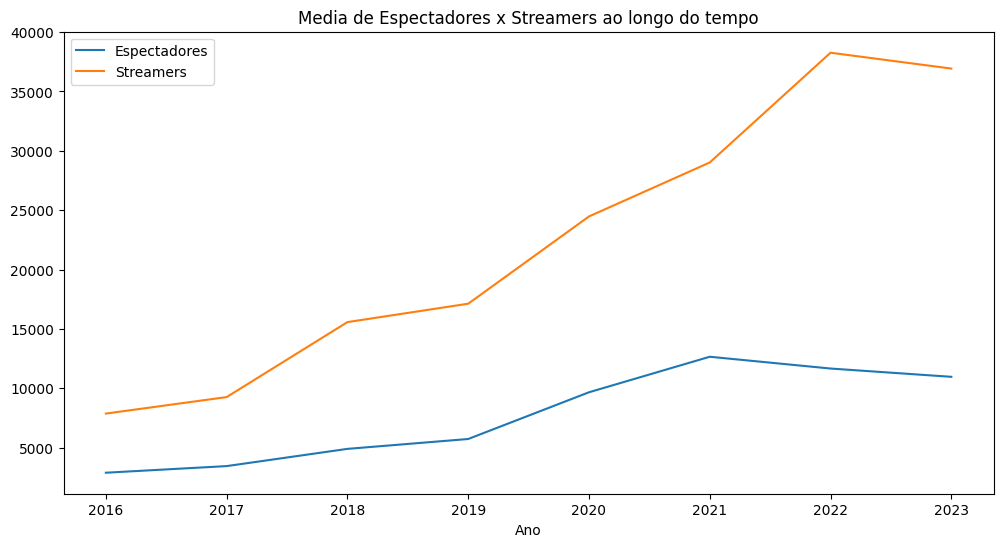

In [25]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (12,6))

#Removendo escala logarítmica
plt.ticklabel_format(style='plain')


#Plot Principal
plt.plot(df_mediaviewiers_ano['Year'], df_mediaviewiers_ano['Viewers'], label = 'Espectadores')
plt.plot(df_mediastreamers_ano['Year'], df_mediastreamers_ano['Streamers'], label = 'Streamers')

#Adicionando os labels
plt.xlabel('Ano')
plt.title('Media de Espectadores x Streamers ao longo do tempo')
plt.legend()

plt.show()

In [26]:
# Qual a % de total de horas assistidas no período pré-pandemia (até 2019) e pós pandemia (após 2020)

df_pand = df

#Criando uma nova coluna para época
df_pand['Epoca'] = 'Pos-Pandemia'

# Atualizando os valores para 'Pre-Pandemia' onde a condição for verdadeira
df_pand.loc[(df_pand['Year'] >= 2016) & (df_pand['Year'] <= 2019), 'Epoca'] = 'Pre-Pandemia'

df_soma_ano_pand = df_pand.groupby(['Epoca'])['Hours_watched'].sum().reset_index(name ='Total_Hours_watched')

#Calculando a porcentagem de cada epoca
Total_Horas = df_pand['Hours_watched'].sum()
df_soma_ano_pand['Porcentagem'] = 0

df_soma_ano_pand.loc[df_soma_ano_pand['Epoca'] == 'Pre-Pandemia', 'Porcentagem'] = (df_soma_ano_pand['Total_Hours_watched'] / Total_Horas * 100).round(2)
df_soma_ano_pand.loc[df_soma_ano_pand['Epoca'] == 'Pos-Pandemia', 'Porcentagem'] = (df_soma_ano_pand['Total_Hours_watched'] / Total_Horas * 100).round(2)


print(df_soma_ano_pand)

          Epoca  Total_Hours_watched  Porcentagem
0  Pos-Pandemia          73872233269        71.29
1  Pre-Pandemia          29744873082        28.71


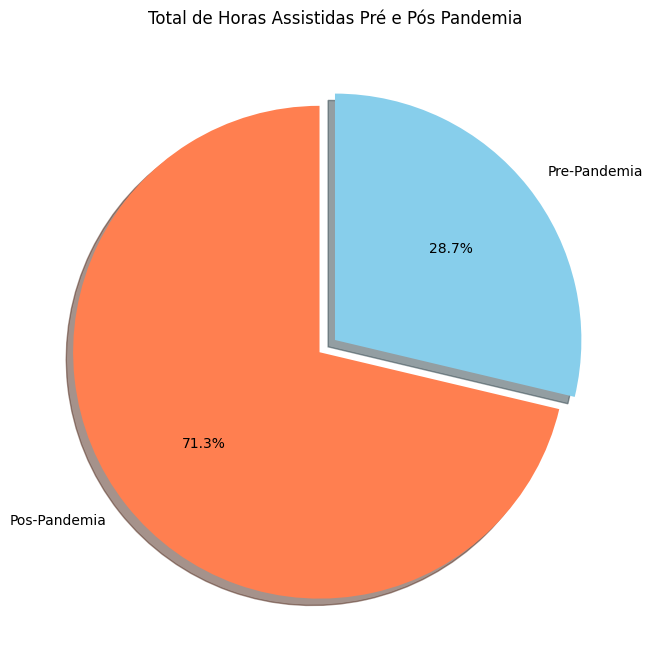

In [27]:
#Plot

#Tamanho do Gráfico
plt.figure(figsize = (8,8))
explode = (0.08, 0.0)

#Plot Principal
plt.pie(df_soma_ano_pand['Porcentagem'], labels = df_soma_ano_pand['Epoca'], colors = ['coral', 'skyblue'], autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)


#Adicionando os labels
plt.title('Total de Horas Assistidas Pré e Pós Pandemia')

plt.show()

Text(0.5, 1.0, 'Relacao entre Horas Exibidas e Horas Assistidas')

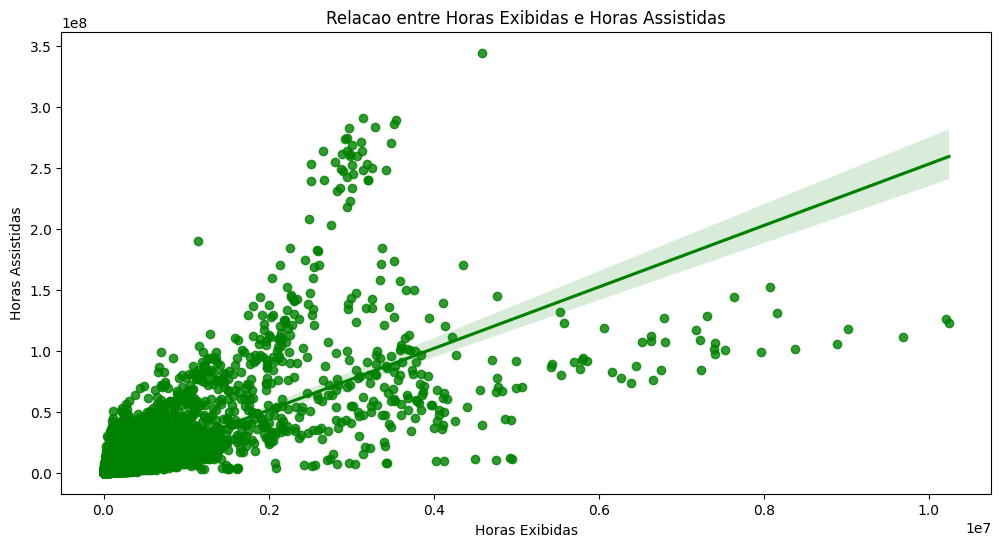

In [29]:
#Relacao entre Horas Exibidas e Horas Assistidas

#Plot
plt.figure(figsize = (12, 6))
sns.regplot(x = df['Hours_streamed'], y = df['Hours_watched'], color = 'green')
plt.xlabel('Horas Exibidas')
plt.ylabel('Horas Assistidas')
plt.title('Relacao entre Horas Exibidas e Horas Assistidas')

## Com base nesse dataset, podemos perceber que a Twitch ganhou relevância com o passar dos anos, mas foi depois da pandemia que houve seu maior crescimento. O número de Streamers e espectadores na plataforma vem crescendo ano após ano.
## No começo, os games dominavam as transmissões da plataforma, mas após 2019 a categoria "Just Chatting", que abrange um conteúdo mais variado (conversa, "reacts", etc), começou a ganhar espaço e, embora represente apenas 11% do total de horas assistidas, aparece como sendo a principal categoria assistida a partir de 2020.